In [1]:
import mrcfile
import matplotlib.pyplot as plt
import time
import os
import re
import tifffile
from skimage.io import imread
import numpy as np
import scipy.fft as sfft
from skimage import exposure
import sys

Duplicate key in file PosixPath('/work/Documents/课题1/project1/autoemage_env/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 270 ('font.serif:      DejaVu Serif, Bitstream Vera Serif, Computer Modern Roman, New Century Schoolbook, Century Schoolbook L, Utopia, ITC Bookman, Bookman, Nimbus Roman No9 L, Times New Roman, Times, Palatino, Charter, serif')


In [83]:
mrc = mrcfile.open("/work/Documents/课题1/project1/test1_eer_DW.mrc")
data = mrc.data
mrc.close
im1 = exposure.equalize_hist(data)

In [59]:
coordinates_list = []
with open("/work/Pictures/test11/Extract/CtfFind/test11_0016_SumCorr_DW_extract.star") as f:
    lines = f.readlines()[22:]
    non_blank_lines = list(filter(lambda x: x.strip(), lines))
    for i in non_blank_lines:
        new_line = " ".join(i.split())
        x = float(new_line.split()[0])
        y = float(new_line.split()[1])
        coordinates_list.append([x,y])
        #coordinates_list.append(coor_list)

In [60]:
coordinates = np.array(coordinates_list)

In [105]:
an = np.linspace(0, 2*np.pi, 100)

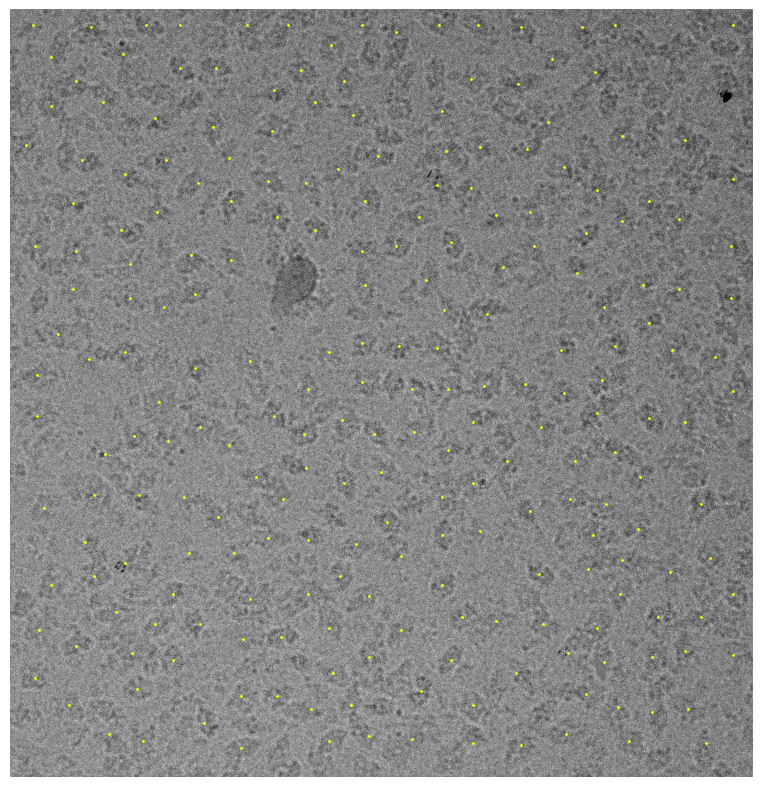

In [67]:
fig, axe = plt.subplots(1,1,figsize=(8,8))
axe.imshow(im1, cmap='gray')
axe.scatter(coordinates[:,0], coordinates[:,1], s=1, c='yellow')
axe.set_axis_off()
plt.subplots_adjust(left=0.02, bottom=0.02, right=0.98, top=0.98)
plt.show()
#plt.savefig("/work/Pictures/drawing/autopicking.png", format='png', dpi=600)

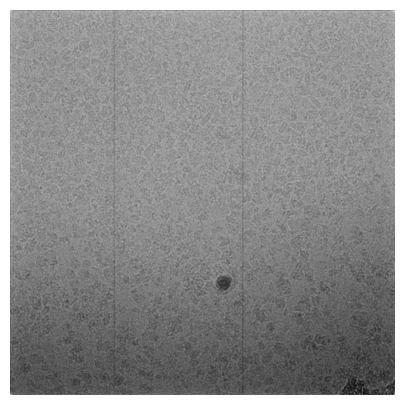

In [84]:
fig, axe = plt.subplots(1,1,figsize=(5,5))
axe.imshow(im1, cmap='gray')
axe.set_axis_off()
plt.show()
#plt.savefig("/work/Pictures/drawing/motion_corrected.png", format='png', dpi=600)

In [115]:
mrc1 = mrcfile.open("/work/Pictures/test11/CtfFind/test11_0016_ctf.mrc")
data2 = mrc1.data
mrc1.close()

In [117]:
data2.shape

(1, 512, 512)

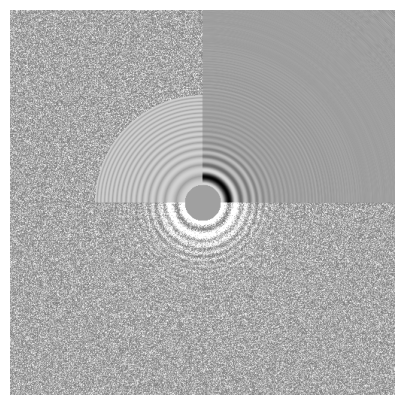

In [116]:
fig, axe = plt.subplots(1,1,figsize=(5,5))
axe.imshow(data2[0,:,:], cmap='gray')
axe.set_axis_off()
plt.savefig("/work/Pictures/drawing/CTF.png", format='png', dpi=600)

In [164]:
mrc = mrcfile.open("/work/Documents/课题1/project1/bad_classes.mrcs")
data = mrc.data
mrc.close()

In [183]:
resolution_list = []
np_list = []
with open("/work/Documents/课题1/project1/bad_classes_model.star") as f:
    for line in f:
        line_elements = (line.rstrip()).split('@') #抓取包含@的字符串
        if re.search("EstimatedResolution", line):
            resolution_position = int(line.split("#")[1])
        if re.search("@", line):
            new_line = " ".join(line.split())
            resolution_list.append(float((new_line.split(" ")[resolution_position-1])[0:4]))
with open("/work/Documents/课题1/project1/bad_classes_data.star") as f1:
    for line in f1:
        if re.search("ClassNumber", line):
            class_position = int(line.split("#")[1])
        if re.search("@", line):
            new_line = " ".join(line.split())
            np_list.append(int(new_line.split(" ")[class_position-1]))
np_array = np.zeros(50, dtype=int)
for m in np_list:
    np_array[m-1] += 1

In [174]:
np_array

array([ 233,  304,  270,  213, 1257,  362,  821,  163,  124,  539, 1350,
         30,  777,   54,  388,  148,  194,  239,  466,  166,  355,  277,
        216,  277,  183,  347,  347,  207,  365,  206, 1312,  215,  346,
        593,   47, 1340,   37,  380,   90,   14,  188,   92,  134,  268,
         98,  139,  469,  501,  318,  107])

In [175]:
class_list = [5, 7, 17, 42]

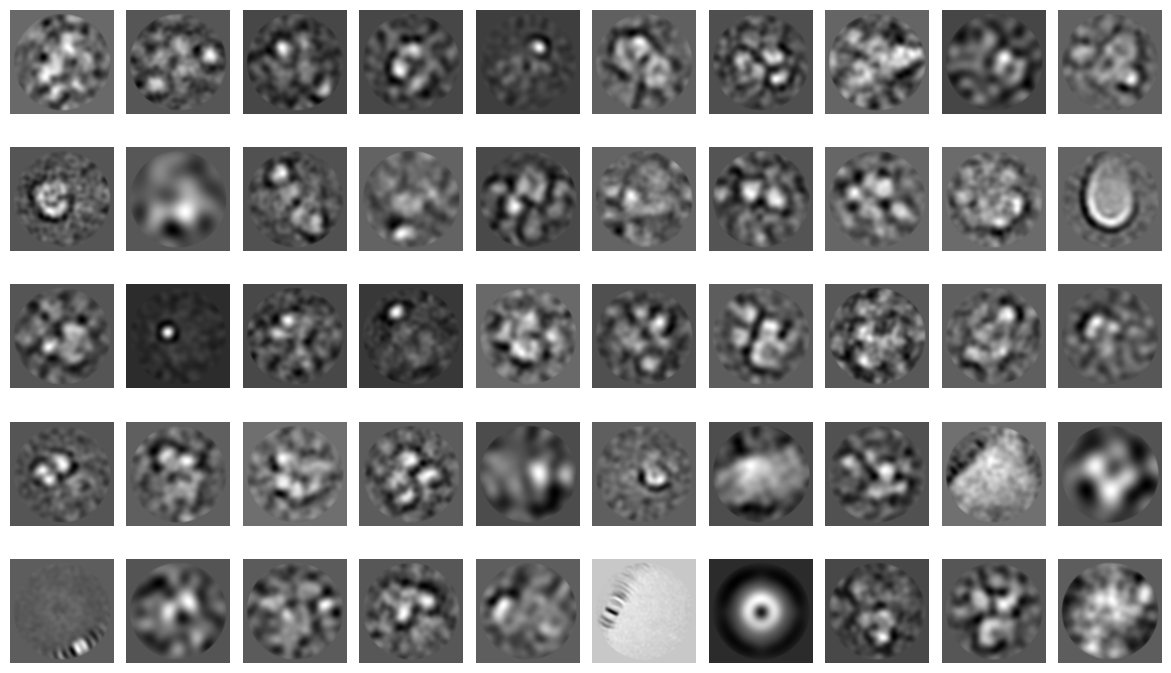

In [179]:
a = 50
row_n = 10
n = a//row_n
r = a%row_n
if r != 0:
    n += 1

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
angs = (r"$\mathrm{\AA}$")
fig, axes = plt.subplots(n,row_n, figsize=(12,7))
for x in range(n):
    for y in range(row_n):
        if x*row_n+y < a:
            axes[x,y].imshow(data[x*row_n+y,:,:], cmap = 'gray')
            axes[x,y].set_axis_off()
            #axes[x,y].set_title(f"{np_array[x*row_n+y]} particles, {resolution_list[x*row_n+y]} {angs}")
plt.subplots_adjust(left=0.02, bottom=0.02, right=0.98, top=0.98, wspace=0.12, hspace=0.12)
plt.show()
#plt.savefig(f"/work/Pictures/drawing/4classes.png", format='png', dpi=600)

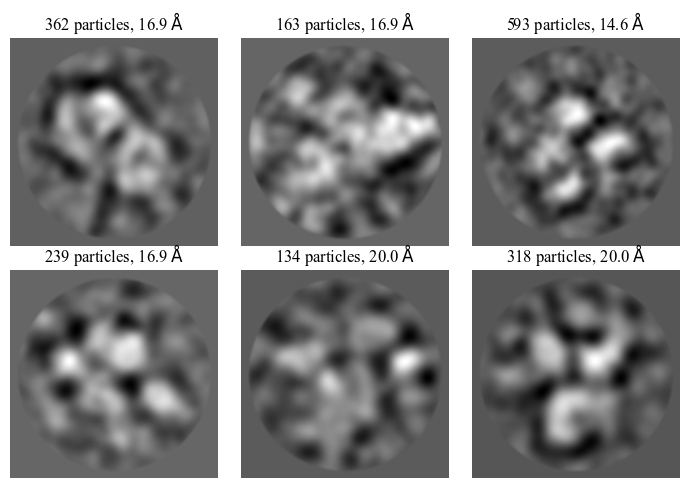

In [186]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
angs = (r"$\mathrm{\AA}$")
fig, axes = plt.subplots(2,3, figsize=(7,5))
axes[0,0].imshow(data[5,:,:], cmap = 'gray')
axes[0,0].set_axis_off()
axes[0,0].set_title(f"{np_array[5]} particles, {resolution_list[5]} {angs}")
axes[0,1].imshow(data[7,:,:], cmap = 'gray')
axes[0,1].set_axis_off()
axes[0,1].set_title(f"{np_array[7]} particles, {resolution_list[7]} {angs}")
axes[1,0].imshow(data[17,:,:], cmap = 'gray')
axes[1,0].set_axis_off()
axes[1,0].set_title(f"{np_array[17]} particles, {resolution_list[17]} {angs}")
axes[1,1].imshow(data[42,:,:], cmap = 'gray')
axes[1,1].set_axis_off()
axes[1,1].set_title(f"{np_array[42]} particles, {resolution_list[42]} {angs}")
axes[0,2].imshow(data[33,:,:], cmap = 'gray')
axes[0,2].set_axis_off()
axes[0,2].set_title(f"{np_array[33]} particles, {resolution_list[33]} {angs}")
axes[1,2].imshow(data[48,:,:], cmap = 'gray')
axes[1,2].set_axis_off()
axes[1,2].set_title(f"{np_array[48]} particles, {resolution_list[48]} {angs}")
plt.subplots_adjust(left=0.02, bottom=0.02, right=0.98, top=0.9, wspace=0.1, hspace=0.12)
#plt.show()
plt.savefig(f"/work/Pictures/drawing/bad_classes.png", format='png', dpi=600)

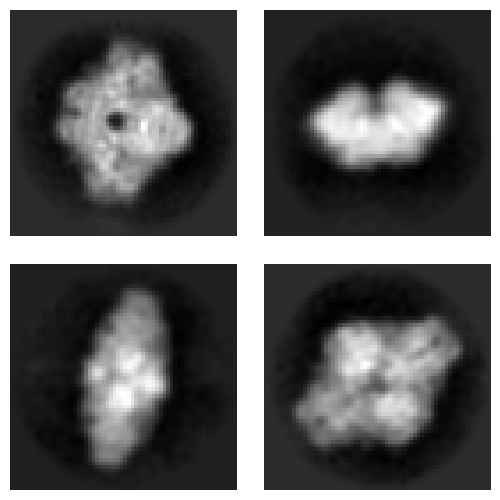

In [125]:
fig, axes = plt.subplots(2,2, figsize=(5,5))
axes[0,0].imshow(data[22,:,:], cmap = 'gray')
axes[0,0].set_axis_off()
axes[0,1].imshow(data[31,:,:], cmap = 'gray')
axes[0,1].set_axis_off()
axes[1,0].imshow(data[43,:,:], cmap = 'gray')
axes[1,0].set_axis_off()
axes[1,1].imshow(data[45,:,:], cmap = 'gray')
axes[1,1].set_axis_off()
plt.subplots_adjust(left=0.02, bottom=0.02, right=0.98, top=0.98, wspace=0.12, hspace=0.12)
#plt.show()
plt.savefig(f"/work/Pictures/drawing/4classes.png", format='png', dpi=600)

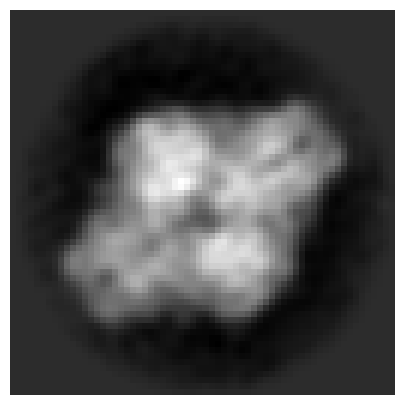

In [130]:
fig, axes = plt.subplots(1,1, figsize=(5,5))
axes.imshow(data[45,:,:], cmap = 'gray')
axes.set_axis_off()
#plt.show()
plt.savefig(f"/work/Pictures/drawing/classes_46.png", format='png', dpi=600)

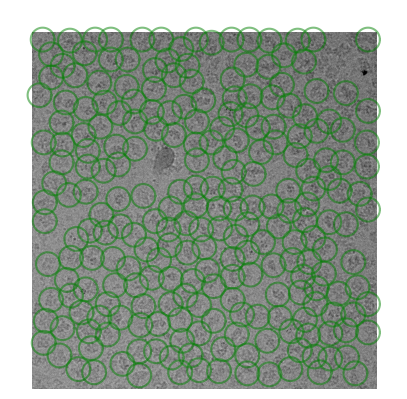

In [109]:
fig, axe = plt.subplots(1,1,figsize=(5,5))
axe.imshow(im1, cmap='gray')
for i in range(len(coordinates)):
    X = coordinates[i,0]+128*np.cos(an)
    Y = coordinates[i,1]+128*np.sin(an)
    axe.plot(X,Y,'g', alpha=0.5)
axe.set_axis_off()
plt.show()

In [19]:
img = tifffile.TiffFile("/home/cyh/Pictures/K3/relion/Images-Disc1/GridSquare_12385179/Data/20170629_00021_frameImage.tiff")
img1 = tifffile.TiffFile("/work/Pictures/beta_gala1/Images-Disc1/GridSquare_34279123/Data/20170629_00001_frameImage.tif")

In [90]:
an = np.linspace(0, 2*np.pi, 100)
x = 2686.6+128*np.cos(an)
y = 1670.7+128*np.sin(an)

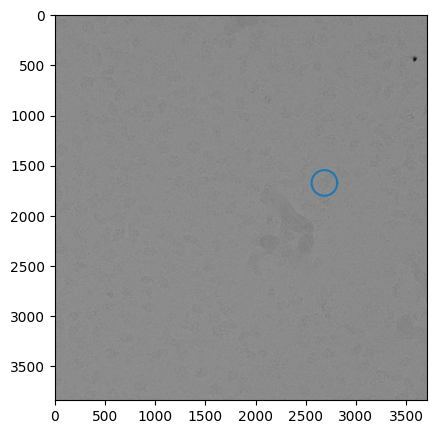

In [91]:
plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.plot(x,y)
plt.show()

In [6]:
data = tifffile.TiffFile('/work/Pictures/test2/test2_0001.tif')

In [7]:
data.pages[0].shape

(8184, 11520)

In [115]:
resolution_a[99]

0.31086717018858445

In [90]:
resolution_a = []
FSC = []
with open("/work/Documents/SPA/relion/postprocess.txt") as f:
    lines = f.readlines()
    for i in lines:
        new_line = " ".join(i.split())
        resolution_a.append(1/float(new_line.split(" ")[2]))
        FSC.append(float(new_line.split(" ")[3]))

In [124]:
x1 = np.linspace(0,0.41,100)
y1 = 0.15*np.ones(100)
x2 = 0.31*np.ones(100)
y2 = np.linspace(-0.1,1.1,100)

In [127]:
import matplotlib.image as img
import matplotlib

In [128]:
image = img.imread("/work/Documents/课题1/文章/3D_model_refined.png")

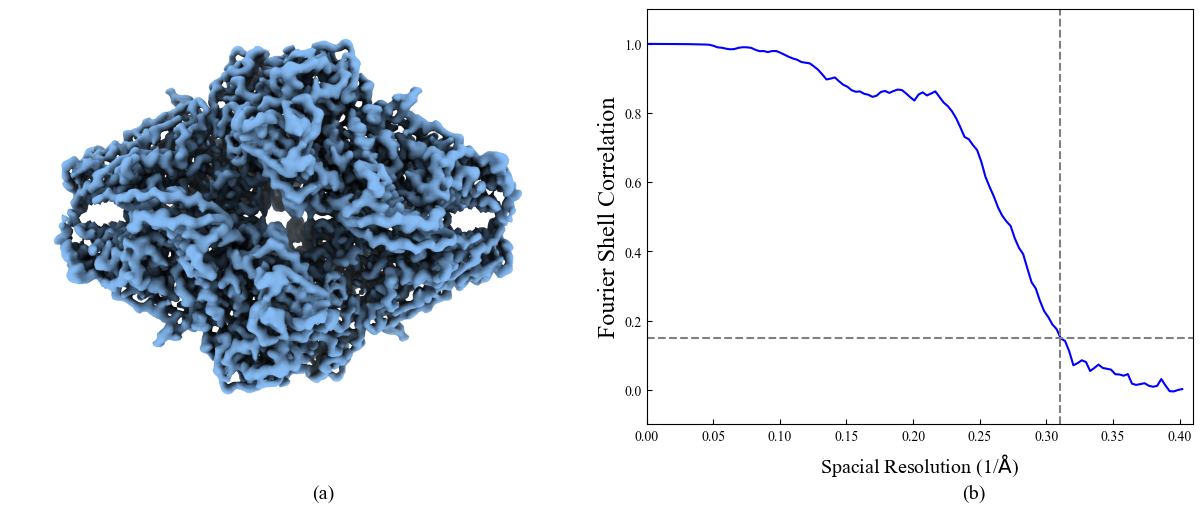

In [163]:
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = 'Times New Roman'
fig, axes = plt.subplots(1,2, figsize=(13,5), gridspec_kw={'width_ratios':[5,4]})
axes[1].plot(resolution_a, FSC, 'b')
axes[1].plot(x1, y1, '--', color='gray')
axes[1].plot(x2, y2, '--', color='gray')
axes[1].tick_params(direction='in')
axes[1].set_ylabel("Fourier Shell Correlation", fontsize='xx-large', labelpad=3)
axes[1].set_xlabel(r"Spacial Resolution (1/$\mathrm{\AA}$)", fontsize='x-large', labelpad=6)
axes[1].set_xlim([0,0.41])
axes[1].set_ylim([-0.1,1.1])
axes[0].imshow(image)
axes[0].set_axis_off()
axes[0].annotate(text='(a)', xy=[], xytext=[0.24,0.015], xycoords = 'figure fraction', fontsize='x-large')
axes[1].annotate(text='(b)', xy=[], xytext=[0.74,0.015], xycoords = 'figure fraction', fontsize='x-large')
plt.subplots_adjust(left=0.02, bottom=0.15, right=0.98, top=0.98, wspace=0.03)
#plt.show()
plt.savefig("/work/Documents/课题1/文章/3D_model_resolution.png", dpi=600)

In [41]:
filename = '/work/Documents/SPA/relion/Select/job032/class_averages.star'
class_list = []
resolution_list = []
with open(filename) as f:
    for line in f:
        line_elements = (line.rstrip()).split('@') #抓取包含@的字符串
        if re.search("@", line):
            class_list.append(int(line_elements[0][-3:]))
            resolution_list.append(int(line_elements[1][-9:-7]))

In [15]:
filename = '/work/Documents/SPA/relion/Select/job032/rank_data.star'
np_list = []
with open(filename) as f:
    for line in f:
        line_elements = (line.rstrip()).split('@') #抓取包含@的字符串
        if re.search("@", line):
            np_list.append(int(line_elements[0][35:38]))

In [78]:
filename = '/work/Documents/SPA/relion/Select/job032/rank_data.star'
np_list = []
with open(filename) as f:
    for line in f:
        if re.search("ClassNumber", line):
            position_n = int(line.split("#")[1])
        if re.search("@", line):
            new_line = " ".join(line.split())
            np_list.append(int(new_line.split(" ")[position_n-1]))

In [80]:
position_n

3

In [24]:
np_array = np.zeros(100, dtype=int)
for i in np_list:
    np_array[i-1] += 1

In [25]:
np_array

array([ 52, 282,  35,  41,  21,  40,   8,  20, 191,  24, 142,   6, 166,
        16,  41,  25, 104,  23, 119,  26, 135, 139,  27,  56,  19,  23,
       118,  16, 188, 101,  52, 205,   8, 134,  12,  10,  11,  33, 163,
        45, 222,   6, 228,  17,  16,  10,  40,  18, 226,  18, 110,   8,
       236,  17,  85,  21, 196,  83,   9,  10,   7,  52,  73,   9, 315,
        21, 250,   9,  33,  24,   8,  17,   9,  34,   9, 104, 168,  83,
        25, 116, 122, 180,  34,  22, 138,  11, 182, 192, 271,  20,  30,
        15,   5, 138,  58,  10, 238,  19,  91,   8])

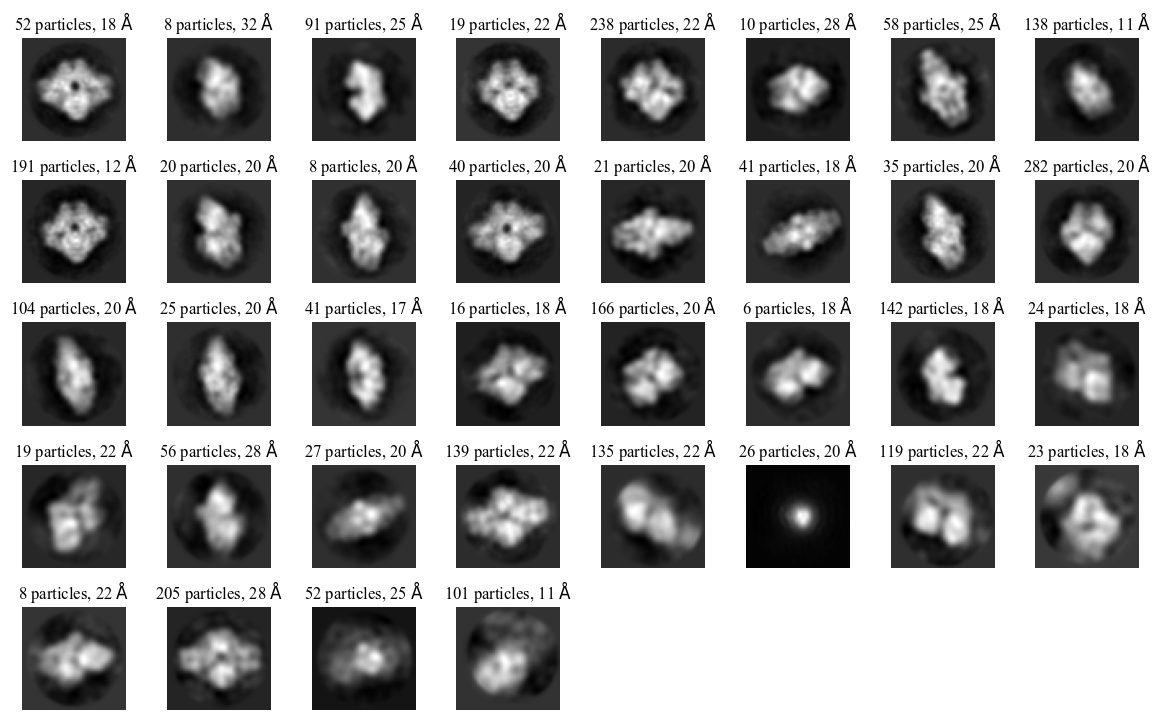

In [56]:
mrc = mrcfile.open("/work/Documents/SPA/relion/Class2D/job030/run_it200_classes.mrcs")
data = mrc.data
mrc.close()
a = len(class_list)
row_n = 8
n = a//row_n
r = a%row_n
if r != 0:
    n += 1

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
b = (r"$\mathrm{\AA}$")
fig, axes = plt.subplots(n,row_n, figsize=(12,7))
for x in range(n):
    for y in range(row_n):
        if x*row_n+y < a:
            axes[x,y].imshow(data[class_list[x*row_n+y]-1,:,:], cmap = 'gray')
            axes[x,y].set_axis_off()
            axes[x,y].set_title(f"{np_array[x*row_n-y]} particles, {resolution_list[x*row_n-y]} {b}")
        elif x*row_n+y >= a and x*row_n+y < n*row_n:
            axes[x,y].set_axis_off()
        else:
            break
#边距设置
plt.subplots_adjust(left=0.02, bottom=0.02, right=0.98, top=0.98, wspace=0.04, hspace=0.38)
#设置字体
plt.show()

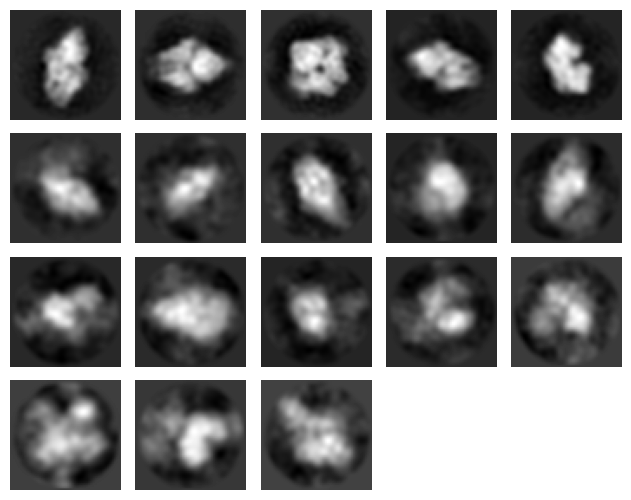

In [33]:
plt.figure(figsize=(6.5,5))
for i, c in enumerate(class_list):
    axe = plt.subplot(4,5,i+1)
    axe.imshow(data[c-1,:,:], cmap='gray')
    axe.set_axis_off()

#边距设置
plt.subplots_adjust(left=0.02, bottom=0.02, right=0.98, top=0.98, wspace=0.02, hspace=0.12)
#设置字体
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.show()
#plt.savefig(f"{path}Class2D/run{j}to{i}/classes{j}to{i}.png", format='png', dpi=100)

In [45]:
with open('/work/Pictures/ABC/MotionCorr/ABC_0001-Patch-Frame.log', 'r') as file:
    lines = file.readlines()[5:]
    non_blank_lines = list(filter(lambda x: x.strip(), lines))
print(lines)

['   1   943.34   863.16    -2.00     1.16    0\n', '   1  2474.28   863.16    -2.05    -1.49    0\n', '   1  4181.10   815.20    -0.94     0.35    0\n', '   1  5760.00   815.20    -0.71    -1.26    0\n', '   1  7782.60   815.20    -0.70    -0.63    0\n', '   1  8681.97   815.20     1.16    -2.07    0\n', '   1 10696.57   815.20    -0.40    -2.17    0\n', '   1   819.43  2453.60    -2.97     0.50    0\n', '   1  2562.22  2397.66    -2.54    -0.68    0\n', '   1  4001.22  2461.59    -1.37    -0.73    0\n', '   1  5712.03  2397.66    -0.10    -0.52    0\n', '   1  7422.85  2525.53    -0.66     0.01    0\n', '   1  8953.78  2525.53     0.65     0.49    0\n', '   1 10664.59  2333.72     0.53     0.68    0\n', '   1   851.41  4187.91    -0.97     1.15    0\n', '   1  2742.10  4060.03    -2.64    -0.60    0\n', '   1  4113.14  4092.00    -2.64     1.46    0\n', '   1  5760.00  4092.00    -0.66    -0.10    0\n', '   1  7422.85  4060.03    -0.49     0.31    0\n', '   1  9049.72  4092.00     1.

In [83]:
x_coor = []
y_coor = []
for i in non_blank_lines:
    new_line = " ".join(i.split())
    print(new_line)
    x = float(new_line.split()[1])
    y = float(new_line.split()[2])
    dx = float(new_line.split()[3])
    dy = float(new_line.split()[4])
    x_coor.append(x+50*dx)
    y_coor.append(y+50*dy)

1 943.34 863.16 -2.00 1.16 0
1 2474.28 863.16 -2.05 -1.49 0
1 4181.10 815.20 -0.94 0.35 0
1 5760.00 815.20 -0.71 -1.26 0
1 7782.60 815.20 -0.70 -0.63 0
1 8681.97 815.20 1.16 -2.07 0
1 10696.57 815.20 -0.40 -2.17 0
1 819.43 2453.60 -2.97 0.50 0
1 2562.22 2397.66 -2.54 -0.68 0
1 4001.22 2461.59 -1.37 -0.73 0
1 5712.03 2397.66 -0.10 -0.52 0
1 7422.85 2525.53 -0.66 0.01 0
1 8953.78 2525.53 0.65 0.49 0
1 10664.59 2333.72 0.53 0.68 0
1 851.41 4187.91 -0.97 1.15 0
1 2742.10 4060.03 -2.64 -0.60 0
1 4113.14 4092.00 -2.64 1.46 0
1 5760.00 4092.00 -0.66 -0.10 0
1 7422.85 4060.03 -0.49 0.31 0
1 9049.72 4092.00 1.76 0.73 0
1 10696.57 4092.00 0.71 -1.07 0
1 819.43 5726.40 -3.29 1.32 0
1 2562.22 5786.34 -1.48 0.70 0
1 4273.03 5594.53 0.79 0.43 0
1 5891.91 5786.34 1.50 1.30 0
1 7402.86 5726.40 1.21 1.10 0
1 9041.72 5594.53 -0.31 0.77 0
1 10696.57 5726.40 -1.13 0.11 0
1 819.43 7364.80 -0.57 0.53 0
1 2562.22 7368.80 -1.61 -0.05 0
1 3821.35 7368.80 0.75 0.28 0
1 5760.00 7364.80 -0.02 1.41 0
1 7402.86 736

In [84]:
coordinates = np.array([x_coor, y_coor]).T

In [75]:
coordinates

array([[  941.34,   864.32],
       [ 2472.23,   861.67],
       [ 4180.16,   815.55],
       ...,
       [ 7402.9 ,  7362.6 ],
       [ 8955.25,  7319.9 ],
       [10696.86,  7364.1 ]])

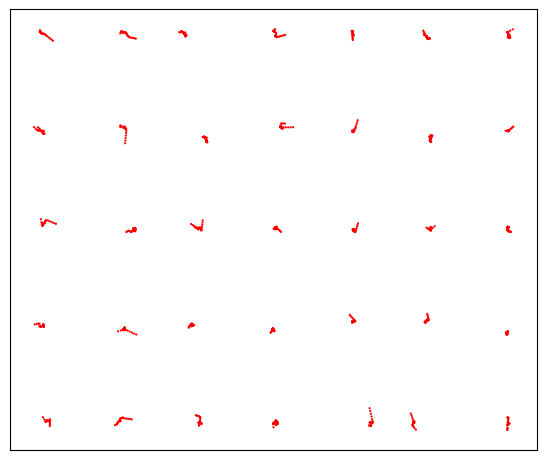

In [91]:
fig, axes = plt.subplots(1,1, figsize=(6,5))
fig.tight_layout()
#axes[0,1].plot(data1[:,1], data1[:,2], color='k', alpha=0.4)
axes.scatter(coordinates[:,0], coordinates[:,1], marker='.', c='r', edgecolors='none', s=10)
#axes.set_xlim(1, 3838)
#axes.set_ylim(1, 3710)
axes.tick_params(left = False, right = False, labelleft = False, 
                 labelbottom = False, bottom = False)

In [97]:
mrc = mrcfile.open("/work/Pictures/DEF/DEF_0002_test_p.mrc")
data = mrc.data
mrc.close()
xlim, ylim = data.shape

In [122]:
from time_to_data_trans import time_to_data_trans
import matplotlib.image as img
from skimage.io import imread
from PIL import Image
import cv2

In [107]:
%%timeit
with open("/work/Pictures/LMN/CtfFind/LMN_DataFile1.txt") as data_f:
    data_lines = data_f.readlines()
new_data = time_to_data_trans(data_lines)

99 µs ± 5.55 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [110]:
%%timeit
image = img.imread('/work/Pictures/LMN/Display/LMN_0001_all.png')

7.02 ms ± 65 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [113]:
%%timeit
image = imread('/work/Pictures/LMN/Display/LMN_0001_all.png')

7.41 ms ± 57.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [127]:
%%timeit
img1 = np.array(Image.open('/work/Pictures/LMN/Display/LMN_0001_all.png'))

6.3 ms ± 118 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [123]:
%%timeit
img1 = cv2.imread('/work/Pictures/LMN/Display/LMN_0001_all.png')

5.82 ms ± 102 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [128]:
img1 = np.array(Image.open('/work/Pictures/LMN/Display/LMN_0001_all.png'))

In [129]:
img1.shape

(500, 600, 4)

In [130]:
image = img.imread('/work/Pictures/LMN/Display/LMN_0001_all.png')

In [134]:
image[:,:,3]

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

In [132]:
img2 = cv2.imread('/work/Pictures/LMN/Display/LMN_0001_all.png')

In [135]:
with open("/work/Pictures/LMN/CtfFind/LMN_DataFile1.txt") as data_f:
    data_lines = data_f.readlines()
new_data = time_to_data_trans(data_lines)

In [141]:
len(np.array(new_data[:2]))

2

In [157]:
import subprocess

In [143]:
cal_dir1 = "/work/Pictures/LMN/"
job_name = "LMN"
Data = loadData(f"{cal_dir1}CtfFind/{job_name}")

In [148]:
Data[0,0]

numpy.datetime64('2023-08-27T23:26')

In [155]:
a = np.ones([20000,10])*3

In [152]:
a.size * a.itemsize

160000

In [164]:
num_s = 1
num_e = 12
dir = "/work/Pictures/JKL/"
subprocess.run("./plot_classes.py", input=f"{num_s}, {num_e}, {dir}", text=True, shell = True)

CompletedProcess(args='./plot_classes.py', returncode=0)

In [165]:
subprocess.run(f"./plot_classes.py {num_s} {num_e} {dir}", shell = True)

CompletedProcess(args='./plot_classes.py 1 12 /work/Pictures/JKL/', returncode=0)

In [189]:
from time_to_data_trans import time_to_data_trans

In [204]:
with open("/work/Pictures/test11/CtfFind/test11_DataFile1.txt") as data_f:
    data_lines = data_f.readlines()
new_data = time_to_data_trans(data_lines)
Data = np.array(new_data)

In [69]:
from functools import reduce

In [71]:
a = list(reduce(np.union1d, ([1, 3, 4, 3], [3, 1, 2, 1], [6, 3, 4, 2])))

In [72]:
a

[1, 2, 3, 4, 6]

In [60]:
B = [0, 2, 5, 11]

In [67]:
if 3 in B:
    print("Yes")
else:
    print("NO")

NO


In [197]:
import matplotlib.dates as mdates

In [210]:
with open("/work/Pictures/test16/CtfFind/test16_DataFile1.txt") as data_f:
    data_lines = data_f.readlines()
    new_data = time_to_data_trans(data_lines)
Data = np.array(new_data)

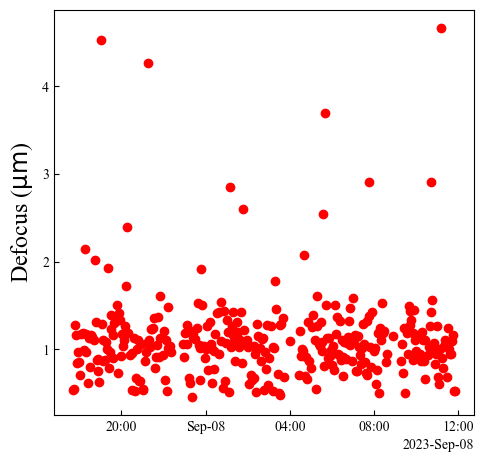

In [212]:
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = 'Times New Roman'
fig, axe = plt.subplots(1,1, figsize=(5,5))
axe.plot_date(Data[:,0], Data[:,1], c='red')
locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
formatter = mdates.ConciseDateFormatter(locator)
axe.xaxis.set_major_locator(locator)
axe.xaxis.set_major_formatter(formatter)
fig.subplots_adjust(left=0.12, bottom=0.15, right=0.96, top=0.96)
axe.tick_params(direction='in')
axe.set_ylabel(r"Defocus ($\mathrm{\mu m}$)", fontsize='xx-large', labelpad=5)
#plt.show()
plt.savefig(f"/work/Documents/课题1/文章/defocus3.png", format='png', dpi=300)